# QUESTION 2

In [1]:
## Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**A. Load the /public/bmort/python/beans.csv data set into a data frame. Are there any missing values? Perform any necessary data imputation on the data set.**

In [2]:
## Loading the dataset
beans = pd.read_csv('/public/bmort/python/beans.csv')
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
beans.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [4]:
## Finding missing values
beans.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRatio        0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       1
ShapeFactor4       0
Class              0
dtype: int64

There is **one** missing value in the data and it can be seen in the **ShapeFactor3** column.

In [5]:
## Dropping the missing value
beans= beans.dropna()
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


**B. Produce a table of summary statistics on the data set. How do the ranges of the values in the columns compare? Does each column of data have similar magnitudes and ranges? Are there any outliers?**

In [6]:
beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000,13532.000000
mean,53057.907848,855.070038,319.924170,202.379107,1.581111,0.750309,53777.654227,253.053341,0.749828,0.987150,0.873652,0.800348,0.006561,0.001719,0.644337,0.995077
std,29402.259447,214.789530,85.836957,45.066500,0.245337,0.091893,29854.190785,59.327003,0.048941,0.004651,0.059412,0.061488,0.001130,0.000596,0.098691,0.004348
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36268.500000,703.149500,253.056814,175.882616,1.430628,0.715128,36668.750000,214.891806,0.718752,0.985674,0.833353,0.763177,0.005889,0.001158,0.582440,0.993717
50%,44580.500000,793.896500,296.427483,192.497582,1.549894,0.764009,45122.500000,238.247047,0.759909,0.988287,0.883443,0.801505,0.006643,0.001700,0.642410,0.996394
75%,61423.750000,977.274000,376.361129,217.263679,1.704026,0.809699,62391.000000,279.655408,0.786848,0.990018,0.917039,0.834527,0.007271,0.002173,0.696435,0.997891
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


All the variables in the beans data have their various ranges. From the output above, we can observe that variables like Eccentricity, Extent, Solidity, roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4 ranges from 0 to 1. 

In detecting outliers, we compare the (min value and 25%) for lower outliers and (max and 75%) for upper outliers. It can be observed that there are upper outliers in Area, Perimeter and MajorAxisLength.

**C. Using the Seaborn library’s heatmap() function, generate a plot showing the
correlations between the numerical data in the data set. Show the commands used
to generate the plot and include the plot in your output.**

Text(0.5, 1.0, 'Correlation Heatmap')

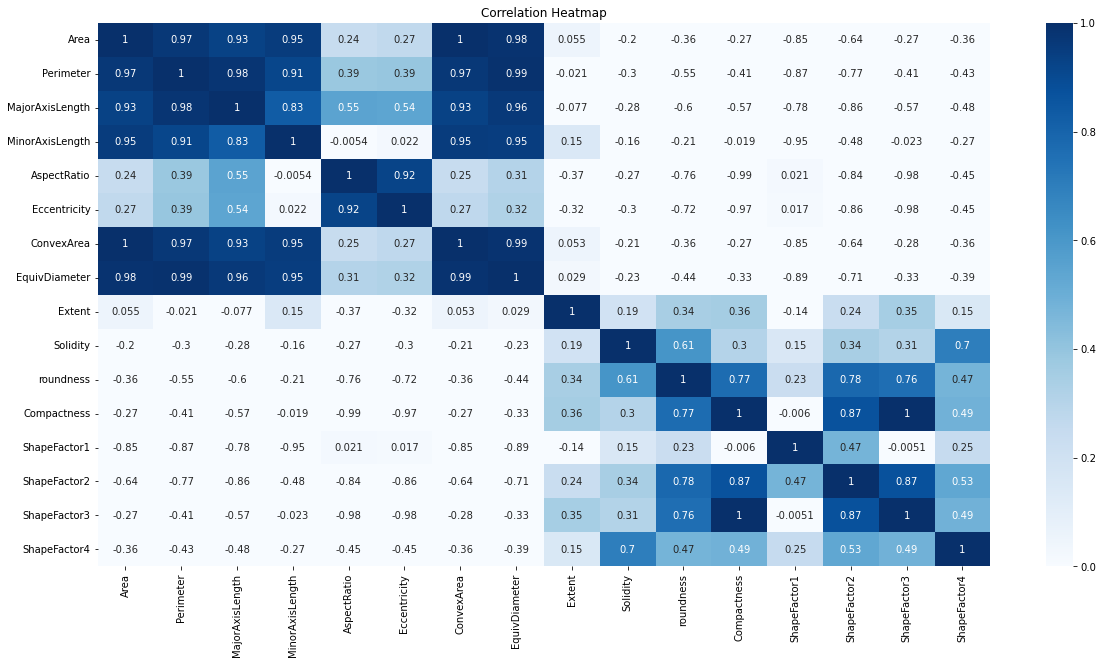

In [7]:
## Showing the correlation between the varibales in the data
b_corr = beans.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data = b_corr, cmap= 'Blues', vmin=0, vmax=1, annot=True)
plt.title('Correlation Heatmap')

**D. Based on the correlation plot, decide which features to include for machine learning.
Decide if any of these features need to be standardized or scaled appropriately.**

In [8]:
## A function to decide which features to select based on a threshold
def correl(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
    return col_corr  

In [9]:
aa = correl(beans, 0.85)
aa

{'Compactness',
 'ConvexArea',
 'Eccentricity',
 'EquivDiameter',
 'MajorAxisLength',
 'MinorAxisLength',
 'Perimeter',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3'}

In [10]:
bb = beans.drop(aa,axis=1 )
bb.head()

,Area,AspectRatio,Extent,Solidity,roundness,ShapeFactor4,Class
0,28395,1.197191,0.763923,0.988856,0.958027,0.998724,SEKER
1,28734,1.097356,0.783968,0.984986,0.887034,0.998430,SEKER
2,29380,1.209713,0.778113,0.989559,0.947849,0.999066,SEKER
3,30008,1.153638,0.782681,0.976696,0.903936,0.994199,SEKER
4,30140,1.060798,0.773098,0.990893,0.984877,0.999166,SEKER


In [11]:
## Using the MinMaxScaler model to tranform the the selected columns
# create a scaler object
features_names = bb[['Area', 'AspectRatio', 'Extent', 'Solidity','roundness','ShapeFactor4']]
scaler = MinMaxScaler()

# fit and transform the data
scaled_bb = pd.DataFrame(scaler.fit_transform(features_names), 
                       columns=features_names.columns)

scaled_bb.head()

,Area,AspectRatio,Extent,Solidity,roundness,ShapeFactor4
0,0.034053,0.122612,0.671024,0.922824,0.934823,0.980620
1,0.035500,0.051577,0.735504,0.871514,0.793138,0.974979
2,0.038259,0.131521,0.716671,0.932141,0.914511,0.987196
3,0.040940,0.091623,0.731365,0.761614,0.826871,0.893675
4,0.041504,0.025565,0.700538,0.949832,0.988408,0.989116


In [12]:
## Replacing the transformed columns into the main data
bb[['Area', 'AspectRatio', 'Extent', 'Solidity','roundness','ShapeFactor4']] = scaled_bb[['Area', 'AspectRatio', 'Extent', 
                                                                                'Solidity','roundness','ShapeFactor4']]
bb.head()

,Area,AspectRatio,Extent,Solidity,roundness,ShapeFactor4,Class
0,0.034053,0.122612,0.671024,0.922824,0.934823,0.980620,SEKER
1,0.035500,0.051577,0.735504,0.871514,0.793138,0.974979,SEKER
2,0.038259,0.131521,0.716671,0.932141,0.914511,0.987196,SEKER
3,0.040940,0.091623,0.731365,0.761614,0.826871,0.893675,SEKER
4,0.041504,0.025565,0.700538,0.949832,0.988408,0.989116,SEKER


In [13]:
# label_encoder object knows how to understand word labels.
label_encoder = LabelEncoder()
  
# Encode labels in column 'Embarked'.
bb['Class']= label_encoder.fit_transform(bb['Class'])
  
bb['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [14]:
bb.isnull().sum()

Area            1
AspectRatio     1
Extent          1
Solidity        1
roundness       1
ShapeFactor4    1
Class           0
dtype: int64

In [15]:
bb =bb.dropna()

**E. Partition the beans data set so that a random sample of 80% of the data will be used 
for training and 20% will be used for testing your machine learning model.**

In [16]:
X = bb[['Area', 'AspectRatio', 'Extent', 'Solidity','roundness','ShapeFactor4']].to_numpy()

In [17]:
y = bb['Class'].to_numpy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train

array([[0.17563067, 0.88438895, 0.58689371, 0.94849764, 0.58003046,
        0.96728057],
       [0.09041572, 0.24418844, 0.50950527, 0.94147436, 0.88770772,
        0.93515237],
       [0.11555278, 0.45633625, 0.47378294, 0.91030518, 0.77003583,
        0.85879414],
       ...,
       [0.01752378, 0.29159808, 0.76915076, 0.90243883, 0.8195333 ,
        0.9434162 ],
       [0.10664999, 0.40520241, 0.55050803, 0.89393413, 0.74447526,
        0.92885895],
       [0.06117952, 0.05628083, 0.69207079, 0.95783437, 0.96841035,
        0.98991808]])

**F. Generate a Random Forest machine learning model for classifying the 7 types of beans based on the chosen features from the data set. Use 50 trees to build the model.** 

In [19]:
#Create a Random Forest Classifier
classif =RandomForestClassifier(n_estimators=50)

# #Train the model using the training sets 
classif.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

**G. Use the test data set (i.e. the 20% of the data that was kept aside earlier) to generate a final validation for your model. Generate a multi-class confusion matrix for the test data to demonstrate the accuracy of the model. Comment on the accuracy of the model.**

In [20]:
# #y_pred=clf.predict(X_test)
y_pred=classif.predict(X_test)


## Generating a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
# sns.he

array([[223,   0,   9,   0,   0,   1,   4],
       [  0, 103,   2,   0,   0,   0,   0],
       [  7,   0, 335,   0,   7,   1,   3],
       [  0,   0,   0, 671,   1,  12,  35],
       [  0,   0,   7,   5, 334,   0,   6],
       [  1,   0,   0,   4,   0, 376,  11],
       [  2,   0,   1,  56,  11,   4, 475]])

From the confusion matrix, it can be said that the model rightly predicted 261 of the trees to belong to Bombay and made wrong predictions of the other trees. This can be said for the other trees in their respective rows.

In [21]:
acc = accuracy_score(y_test, y_pred)
print(f'The accuracy score of the model is {round(acc, 4)*100}%')

The accuracy score of the model is 92.97999999999999%


**H. Based on your model, classify the beans provided in the unlabeled /public/bmort/python/beans-unknown.csv data set. Indicate which classification of the 7 available types has been assigned to each of the 5 unlabeled beans.**

In [22]:
## Loading the new data
new_bb = pd.read_csv('/public/bmort/python/beans-unknown.csv')
new_bb

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,37500,728.191,275.840463,173.818266,1.586948,0.776481,37944,218.509686,0.703406,0.988299,0.888690,0.792160,0.007356,0.001787,0.627517,0.995836
1,37500,715.578,272.171813,175.668301,1.549351,0.763818,37797,218.509686,0.786229,0.992142,0.920295,0.802837,0.007258,0.001860,0.644548,0.998631
2,37511,718.350,267.039757,179.141937,1.490660,0.741599,37868,218.541732,0.717365,0.990573,0.913474,0.818387,0.007119,0.001970,0.669756,0.998379
3,37513,720.028,269.589608,177.510928,1.518721,0.752626,37981,218.547558,0.780545,0.987678,0.909270,0.810668,0.007187,0.001915,0.657182,0.998076
4,37514,725.847,269.881174,177.418223,1.521158,0.753547,37920,218.550471,0.793309,0.989293,0.894773,0.809803,0.007194,0.001908,0.655780,0.997545


In [23]:
## Using the MinMaxScaler model to tranform the the selected columns
# create a scaler object
features_names1 = new_bb[['Area', 'AspectRatio', 'Extent', 'Solidity','roundness','ShapeFactor4']]
scaler = MinMaxScaler()

# fit and transform the data
scaled_bb1 = pd.DataFrame(scaler.fit_transform(features_names1), 
                       columns=features_names1.columns)

scaled_bb1.head()

,Area,AspectRatio,Extent,Solidity,roundness,ShapeFactor4
0,0.000000,1.000000,0.000000,0.138994,0.000000,0.000000
1,0.000000,0.609536,0.921252,1.000000,1.000000,1.000000
2,0.785714,0.000000,0.155260,0.648375,0.784179,0.910090
3,0.928571,0.291430,0.858025,0.000000,0.651155,0.801589
4,1.000000,0.316739,1.000000,0.361813,0.192469,0.611644


In [24]:
new_bb[['Area', 'AspectRatio', 'Extent', 'Solidity','roundness','ShapeFactor4']] = scaled_bb1[['Area', 'AspectRatio', 'Extent', 
                                                                                'Solidity','roundness','ShapeFactor4']]
new_bb

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.000000,728.191,275.840463,173.818266,1.000000,0.776481,37944,218.509686,0.000000,0.138994,0.000000,0.792160,0.007356,0.001787,0.627517,0.000000
1,0.000000,715.578,272.171813,175.668301,0.609536,0.763818,37797,218.509686,0.921252,1.000000,1.000000,0.802837,0.007258,0.001860,0.644548,1.000000
2,0.785714,718.350,267.039757,179.141937,0.000000,0.741599,37868,218.541732,0.155260,0.648375,0.784179,0.818387,0.007119,0.001970,0.669756,0.910090
3,0.928571,720.028,269.589608,177.510928,0.291430,0.752626,37981,218.547558,0.858025,0.000000,0.651155,0.810668,0.007187,0.001915,0.657182,0.801589
4,1.000000,725.847,269.881174,177.418223,0.316739,0.753547,37920,218.550471,1.000000,0.361813,0.192469,0.809803,0.007194,0.001908,0.655780,0.611644


In [25]:
X_new = new_bb[['Area', 'AspectRatio', 'Extent', 'Solidity','roundness','ShapeFactor4']]
X_new

,Area,AspectRatio,Extent,Solidity,roundness,ShapeFactor4
0,0.000000,1.000000,0.000000,0.138994,0.000000,0.000000
1,0.000000,0.609536,0.921252,1.000000,1.000000,1.000000
2,0.785714,0.000000,0.155260,0.648375,0.784179,0.910090
3,0.928571,0.291430,0.858025,0.000000,0.651155,0.801589
4,1.000000,0.316739,1.000000,0.361813,0.192469,0.611644


In [26]:
##Classifying the new the data
new_cl =classif.predict(X_new)
new_cl

array([4, 3, 0, 1, 1])

In [27]:
print(f'The model classifies the new data into 4 = HOROZ, 3 = DEMARSON, 1 = BOMBAY, 1 = BOMBAY, 1 = BOMBAY')

The model classifies the new data into 4 = HOROZ, 3 = DEMARSON, 1 = BOMBAY, 1 = BOMBAY, 1 = BOMBAY
